# **Câncer de Tireóide**

## **1. Introdução**

O câncer de tireoide é uma das neoplasias mais comuns, e sua detecção precoce é essencial para um tratamento eficaz e melhores resultados prognósticos. Com o crescimento das ferramentas de análise de dados e machine learning, surgem novas oportunidades para aprimorar os métodos de diagnóstico e prever a evolução da doença. Este projeto tem como objetivo construir um modelo capaz de prever o câncer de tireoide. Para isso, iremos utilizar a Regressão Logística.

In [1]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set();

In [4]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Portfólio/Dados/Thyroid_Diff.csv')

In [5]:
# Visualizando base de dados

dados.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


**Fonte:** https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data

**Features**

* **Age:** The age of the patient at the time of diagnosis or treatment.

* **Gender:** The gender of the patient (male or female).

* **Smoking:** Whether the patient is a smoker or not.

* **Hx Smoking:** Smoking history of the patient (e.g., whether they have ever smoked).

* **Hx Radiotherapy:** History of radiotherapy treatment for any condition.

* **Thyroid Function:** The status of thyroid function, possibly indicating if there are any abnormalities.

* **Physical Examination:** Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

* **Adenopathy:** Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

* **Pathology:** Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

* **Focality:** Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

* **Risk:** The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

* **T:** Tumor classification based on its size and extent of invasion into nearby structures.

* **N:** Nodal classification indicating the involvement of lymph nodes.

* **M:** Metastasis classification indicating the presence or absence of distant metastases.

* **Stage:** The overall stage of the cancer, typically determined by combining T, N, and M classifications.

* **Response:** Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

* **Recurred:** Indicates whether the cancer has recurred after initial treatment.

## **2. Análise Exploratória de Dados**

In [6]:
# Informações sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

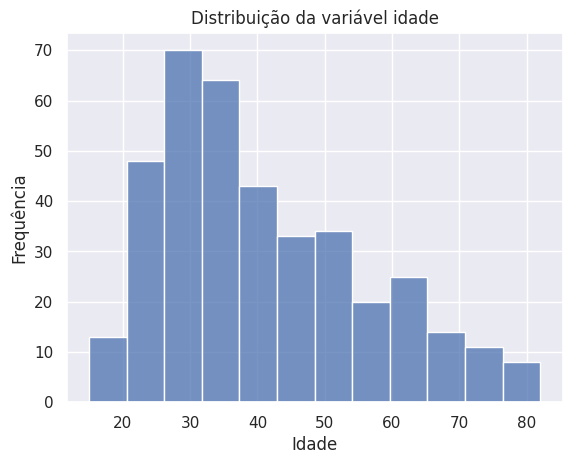

In [7]:
# Gráfico 1: distribuição da variável idade

sns.histplot(dados['Age'])

plt.title('Distribuição da variável idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show();

**Observação 1**

O histograma da variável idade apresenta uma distribuição assimétrica à direita (skewness positiva), com um pico de frequência entre 30 e 40 anos e uma cauda longa que se estende até 80 anos. A maioria dos indivíduos está concentrada entre 20 e 50 anos, com uma queda acentuada após os 50 anos e poucos indivíduos acima de 70 anos. Essa distribuição sugere que a amostra é predominantemente composta por indivíduos jovens e de meia-idade. A assimetria da distribuição indica que medidas de tendência central como a mediana (em torno de 40 anos) são mais apropriadas do que a média para descrever a idade típica.

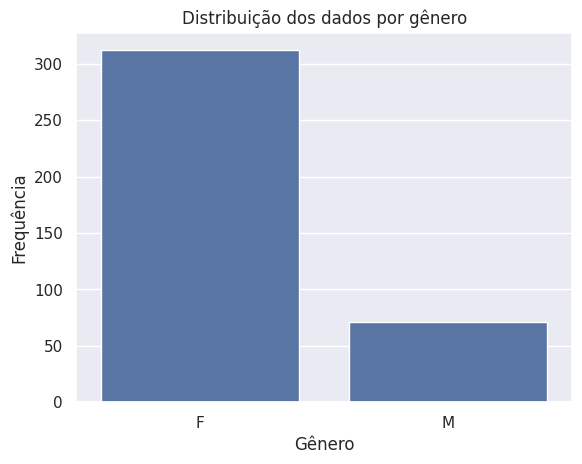

In [8]:
# Gráfico 2: distribuição dos dados por gênero

sns.countplot(x = 'Gender', data = dados)

plt.title('Distribuição dos dados por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')

plt.show();

**Observação 2**

A distribuição de frequência por gênero mostra um desequilíbrio: o gênero feminino (F) apresenta uma frequência próxima de 300, enquanto o gênero masculino (M) está em torno de 50, resultando em uma proporção de 6:1. Do ponto de vista estatístico, esse desbalanceamento pode introduzir viés em análises que assumem representatividade equitativa entre gêneros, como testes de diferença de médias ou modelos de regressão.

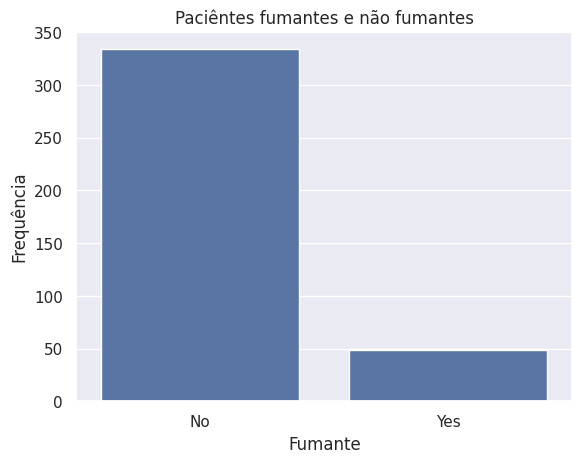

In [9]:
# Gráfico 3: Paciêntes fumantes e não fumantes

sns.countplot(x = 'Smoking', data = dados)

plt.title('Paciêntes fumantes e não fumantes')
plt.xlabel('Fumante')
plt.ylabel('Frequência')

plt.show();

**Observação 3**

O histograma de frequência de pacientes fumantes e não fumantes revela uma distribuição desbalanceada. A categoria "Não fumante" apresenta uma frequência de aproximadamente 300 indivíduos, enquanto a categoria "Fumante" possui cerca de 50, indicando uma proporção de aproximadamente 6:1. Essa distribuição sugere que o hábito de fumar é pouco prevalente na amostra, o que pode ser reflexo de um viés de seleção (por exemplo, pacientes de uma clínica com foco em saúde preventiva) ou de uma população com baixa exposição ao tabagismo. Para fins estatísticos, esse desequilíbrio pode impactar análises inferenciais, como testes de associação entre tabagismo e outras variáveis, devido ao tamanho reduzido da classe minoritária.

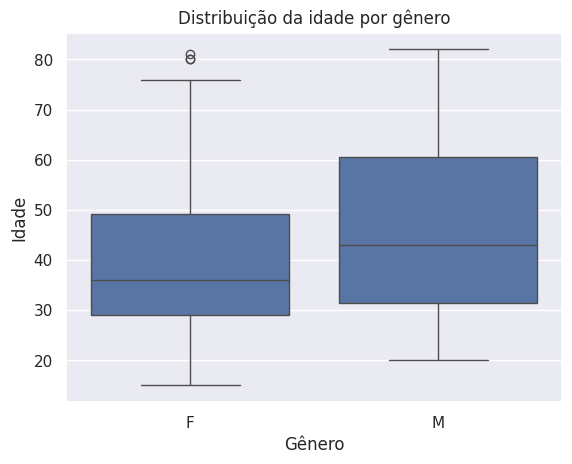

In [10]:
# Gráfico 4: distribuição da idade por gênero

sns.boxplot(x = 'Gender', y = 'Age', data = dados)

plt.title('Distribuição da idade por gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')

plt.show();

**Observação 4**

O boxplot da distribuição da idade por gênero revela diferenças notáveis entre os grupos. Para o gênero feminino (F), a mediana da idade é aproximadamente 40 anos, com um intervalo interquartil (IQR) de 30 a 50 anos e presença de outliers acima de 70 anos. Já para o gênero masculino (M), a mediana está em torno de 50 anos, com IQR de 40 a 60 anos, sem outliers visíveis. A diferença nas medianas sugere que os homens na amostra são, em média, mais velhos que as mulheres. Além disso, a maior dispersão no grupo feminino (IQR mais amplo e outliers) indica maior variabilidade etária entre as mulheres.

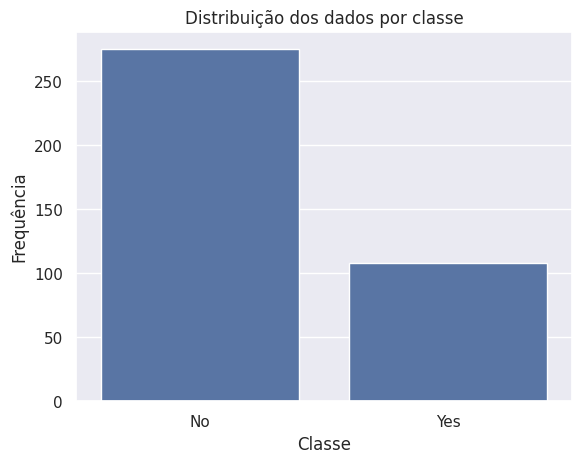

In [11]:
# Gráfico 5: Distribuição dos dados por classe

sns.countplot(x = 'Recurred', data = dados)

plt.title('Distribuição dos dados por classe')
plt.xlabel('Classe')
plt.ylabel('Frequência')

plt.show();

**Observação 5**

O histograma mostra uma distribuição desbalanceada: a classe "Não" tem uma frequência de cerca de 250, enquanto "Sim" apresenta aproximadamente 100, uma proporção de 2,5:1. Essa distribuição indica que a maioria dos pacientes na amostra não tem câncer de tireoide, o que pode refletir uma amostra de triagem ou um estudo com uma população de baixo risco. Esse desequilíbrio é comum em datasets médicos, especialmente para doenças com prevalência relativamente baixa, como o câncer de tireoide, mas pode impactar a performance de modelos de classificação, levando a um viés para a classe majoritária ("Não").

## **3. Pré-Processamento de Dados**

In [12]:
# Convertendo variável target para numérica

dados['Recurred'] = dados['Recurred'].map({'No': 0, 'Yes': 1})

In [13]:
# Separando os dados em previsores e classe

previsores = dados.drop('Recurred', axis = 1)
classe = dados['Recurred']

In [14]:
# Verificando multicolinearidade

## Instânciando objeto
scaler = MinMaxScaler()
label = LabelEncoder()

## Aplicando aos dados
previsores[['Age']] = scaler.fit_transform(previsores[['Age']])

previsores['Gender'] = label.fit_transform(previsores[['Gender']])
previsores['Smoking'] = label.fit_transform(previsores[['Smoking']])
previsores['Hx Smoking'] = label.fit_transform(previsores[['Hx Smoking']])
previsores['Hx Radiothreapy'] = label.fit_transform(previsores[['Hx Radiothreapy']])
previsores['Thyroid Function'] = label.fit_transform(previsores[['Thyroid Function']])
previsores['Physical Examination'] = label.fit_transform(previsores[['Physical Examination']])
previsores['Adenopathy'] = label.fit_transform(previsores[['Adenopathy']])
previsores['Pathology'] = label.fit_transform(previsores[['Pathology']])
previsores['Focality'] = label.fit_transform(previsores[['Focality']])
previsores['Risk'] = label.fit_transform(previsores[['Risk']])
previsores['T'] = label.fit_transform(previsores[['T']])
previsores['N'] = label.fit_transform(previsores[['N']])
previsores['M'] = label.fit_transform(previsores[['M']])
previsores['Stage'] = label.fit_transform(previsores[['Stage']])
previsores['Response'] = label.fit_transform(previsores[['Response']])

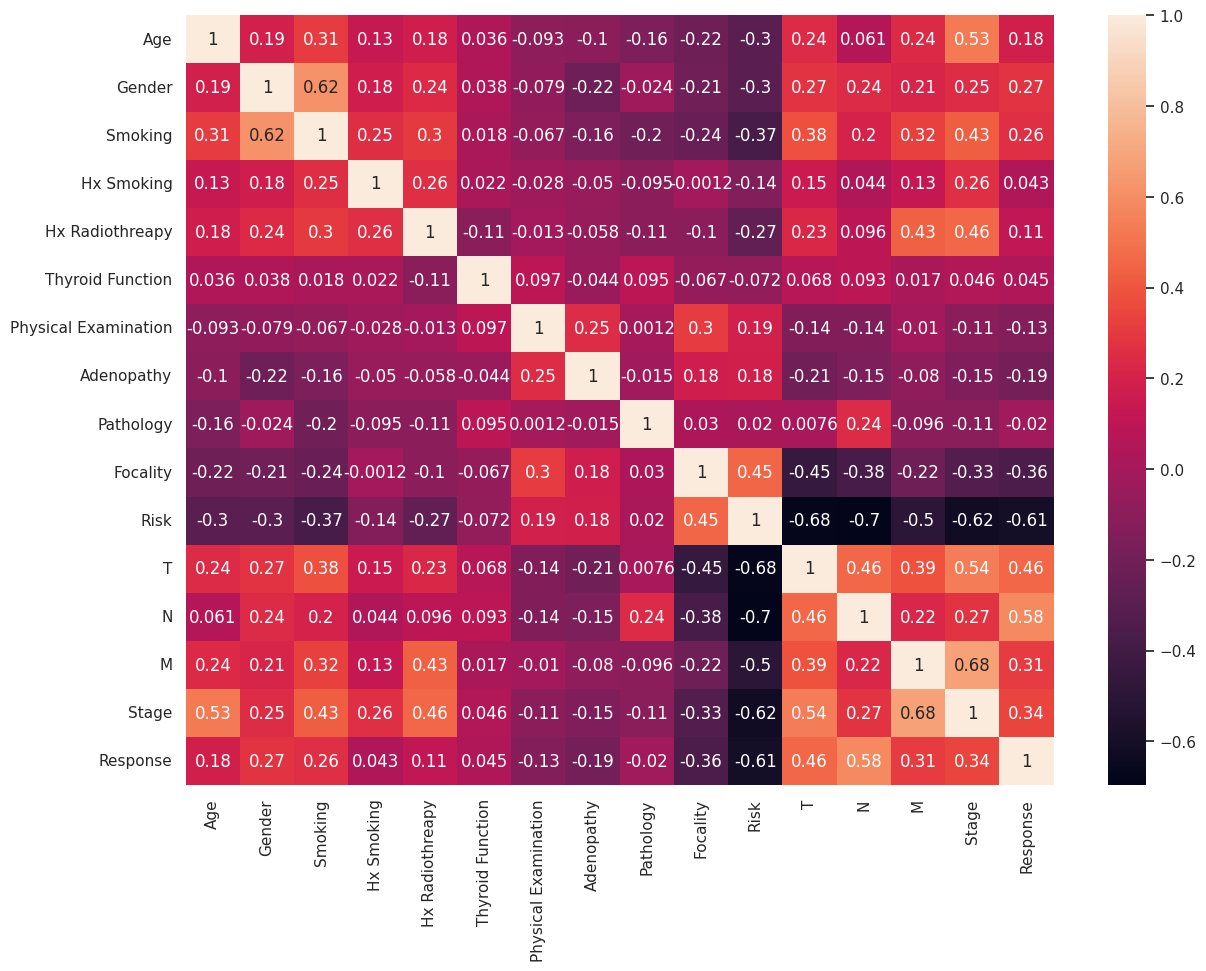

In [15]:
# Verificando correlação entre as variáveis graficamente

plt.figure(figsize=(14, 10))
sns.heatmap(previsores.corr(), annot = True)
plt.show();

**Observação 6:**

A análise da matriz de correlação revelou correlações significativas entre variáveis independentes, indicando a presença de multicolinearidade, que pode comprometer a estabilidade e a interpretabilidade do modelo de regressão logística. As correlações fortes (valor absoluto ≥ 0.7) observadas foram:

* **Risk e T:** -0.680255
* **Risk e N:** -0.696764
* **Stage e M:** 0.681019

Além disso, correlações moderadas (entre 0.5 e 0.7) reforçam a redundância entre as variáveis:

* **Stage e T:** 0.538309
* **Stage e Risk:** -0.619415
* **Risk e Response:** -0.606071
* **N e Response:** 0.583809

Essas correlações sugerem que Stage e Risk são variáveis derivadas, que agregam informações já capturadas por T, N, e M, componentes do sistema de estadiamento TNM.

Com base na análise, as variáveis Stage e Risk foram selecionadas para remoção pelos seguintes motivos:

* **Stage:** Esta variável representa uma combinação de T (tamanho/invasão do tumor), N (envolvimento linfonodal), M (metástases distantes), e, em alguns casos, Age, conforme o sistema TNM. Sua forte correlação com M (0.681019) e correlações moderadas com T (0.538309) e Risk (-0.619415) indicam que ela é redundante, pois suas informações já estão contidas nas variáveis mais granulares (T, N, M).

* **Risk:** A categoria de risco é derivada de fatores como tamanho do tumor (T), envolvimento linfonodal (N), metástases (M), e histologia (Pathology). Suas correlações fortes com T (-0.680255) e N (-0.696764) sugerem que ela agrega pouco valor preditivo além do que essas variáveis já fornecem.

A remoção das variáveis Stage e Risk é justificada pela sua redundância com T, N, e M, confirmada pelas altas correlações observadas na matriz de correlação e pelo contexto clínico do sistema TNM. Essa decisão promove um modelo de regressão logística mais estável, interpretable e eficiente, mantendo as variáveis mais granulares para prever a recorrência do câncer de tireoide.

**Removendo Variáveis Com Multicolinearidade**

In [16]:
# Cópia dos dados originais
dataset = dados.copy()

# Separando os dados em previsores(X) e classe(Y)
## E removendo as variáveis com multicolinearidade
inputs = dataset.drop(['Recurred', 'Stage', 'Risk'], axis = 1)
target = dataset['Recurred']

# Salvando nomes das variáveis categóricas
nomes_cols_categoricas = inputs.select_dtypes(include = 'object').columns.tolist()

In [17]:
# Aplicando OneHotEncoder

## Carregando biblioteca
from sklearn.preprocessing import OneHotEncoder

## Instânciando objeto
onehot = OneHotEncoder(sparse_output = False)

## Aplicando a variáveis de entrada
onehot.fit(inputs[nomes_cols_categoricas])
onehot_cols = onehot.get_feature_names_out(nomes_cols_categoricas)
inputs[onehot_cols] = onehot.transform(inputs[nomes_cols_categoricas])

In [18]:
# Separando os dados em Previsores(X) e Classe(y)

## Concatenando informações e criando um novo dataframe
dataset_final = pd.concat([inputs['Age'],
                           inputs[onehot_cols]],
                          axis=1)

## Escalonando Variável Age
dataset_final['Age'] = scaler.fit_transform(dataset_final[['Age']])

## Separando os dados
X = dataset_final     # independent
y = target            # dependent

In [19]:
# Visualizando dados

dataset_final.head()

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,T_T4b,N_N0,N_N1a,N_N1b,M_M0,M_M1,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.283582,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.223881,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.701493,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.701493,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# Dividindo os dados em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 0)

In [21]:
# Aplicando smote para balancear os dados

## Carregando biblioteca
from imblearn.over_sampling import SMOTE

## Instanciando objeto
smote = SMOTE(random_state = 0)

## Balanceando dados
X_treino, y_treino = smote.fit_resample(X_treino, y_treino)

In [22]:
# Verificando distribuição dos dados

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(448, 47)
(77, 47)
(448,)
(77,)


## **4. Construindo Modelo**

In [23]:
# Carregando biblioteca

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [24]:
# Instanciando o modelo

modelo = LogisticRegression(max_iter = 1000)

In [25]:
# Definindo a grade de hiperparâmetros

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

In [26]:
# Configurando GridSearchCV com validação cruzada estratificada

grid_search = GridSearchCV(
    estimator = modelo,
    param_grid = param_grid,
    cv = StratifiedKFold(n_splits = 10,
                         shuffle = True,
                         random_state = 0),
    n_jobs=-1
)

In [27]:
# Ajustando o modelo com GridSearchCV

grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [28]:
# Exibindo os melhores hiperparâmetros

print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)


Melhores hiperparâmetros encontrados:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
# Obter o melhor modelo

modelo_ajustado = grid_search.best_estimator_

In [30]:
# Validação Cruzada
print("\n## Validação Cruzada")

## Calcular métricas com validação cruzada (F1-score, recall, precisão)

# F1-Score
cv_scores_f1 = cross_val_score(modelo_ajustado,
                               previsores,
                               classe,
                               cv = StratifiedKFold(n_splits = 10,
                                                    shuffle = True,
                                                    random_state = 0),
                               scoring = 'f1')
# Recall
cv_scores_recall = cross_val_score(modelo_ajustado,
                                   previsores,
                                   classe,
                                   cv=StratifiedKFold(n_splits = 10,
                                                      shuffle = True,
                                                      random_state = 0),
                                   scoring = 'recall')
# Precision
cv_scores_precision = cross_val_score(modelo_ajustado,
                                      previsores,
                                      classe,
                                      cv=StratifiedKFold(n_splits = 10,
                                                         shuffle = True,
                                                         random_state = 0),
                                      scoring = 'precision')

print("\nMétricas da Validação Cruzada (10 dobras):")
print(f"F1-Score: {cv_scores_f1.mean():.4f} ± Desvio Padrão: {cv_scores_f1.std():.4f}")
print(f"Recall: {cv_scores_recall.mean():.4f} ± Desvio Padrão: {cv_scores_recall.std():.4f}")
print(f"Precisão: {cv_scores_precision.mean():.4f} ± Desvio Padrão: {cv_scores_precision.std():.4f}")


## Validação Cruzada

Métricas da Validação Cruzada (10 dobras):
F1-Score: 0.8212 ± Desvio Padrão: 0.0713
Recall: 0.8145 ± Desvio Padrão: 0.0912
Precisão: 0.8338 ± Desvio Padrão: 0.0789


In [31]:
# Realizando previsões

previsoes = modelo_ajustado.predict(X_teste)

## **5. Avaliando Modelo**

In [32]:
# Avaliando Desempenho do Modelo com Classification Report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.88      0.88      0.88        26

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77



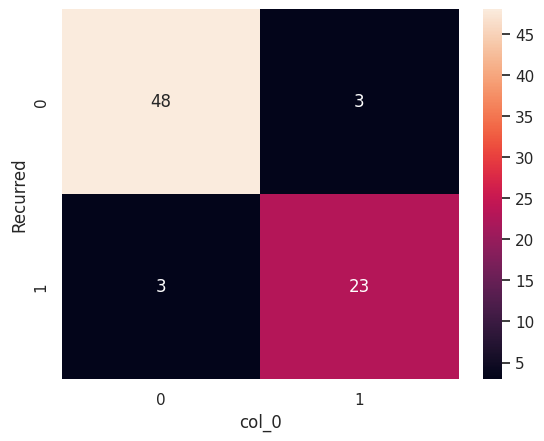

In [33]:
# Plotando Matriz de Confusão

sns.heatmap(pd.crosstab(y_teste, previsoes),
            annot = True,
            fmt = 'd')
plt.show();

# **Considerações Finais**

📌 Considerações Finais

Este estudo demonstrou a importância de uma análise exploratória profunda e da escolha cuidadosa de modelos para o diagnóstico de câncer de tireoide. A Regressão Logística, mesmo sendo um modelo simples e amplamente utilizado, se mostrou eficaz para lidar com os dados clínicos, oferecendo bons resultados em termos de acurácia, precisão e recall, especialmente em um contexto desbalanceado.

🔑 Principais insights:

A análise exploratória revelou a necessidade de lidar com variáveis desbalanceadas e multicolineares, o que influenciou diretamente a escolha do modelo e a eliminação de variáveis redundantes.

A remoção de variáveis derivadas como Stage e Risk mostrou-se crucial para melhorar a estabilidade e a interpretabilidade do modelo, permitindo um entendimento mais claro dos coeficientes.

🔍 Implicações do estudo:

A abordagem com Regressão Logística pode ser uma excelente ferramenta em cenários clínicos onde a interpretabilidade do modelo é tão importante quanto sua precisão. Mesmo com um modelo simples, a compreensão do domínio clínico aliada ao rigor estatístico trouxe uma contribuição significativa ao estudo.

💡 Possíveis melhorias:

Embora a Regressão Logística tenha atendido bem às necessidades do projeto, é possível explorar outros modelos, como Árvores de Decisão ou Random Forest, para comparar o desempenho em termos de classificação, especialmente para detectar padrões mais complexos no comportamento dos dados.

Por fim, este projeto não só reforça o valor da ciência de dados na área da saúde, mas também destaca como técnicas simples podem ser extremamente eficazes quando combinadas com um bom entendimento do problema e das características dos dados.